In [166]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, log_loss, confusion_matrix,classification_report

In [167]:
train_values = pd.read_csv("diabetes.csv")

In [168]:
train_values.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [169]:
train_values.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [170]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [171]:
train_values['BloodPressure'].value_counts()

70     57
74     52
68     45
78     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
92      8
75      8
65      7
94      6
85      6
48      5
44      4
96      4
110     3
100     3
98      3
106     3
108     2
104     2
30      2
55      2
46      2
40      1
38      1
24      1
95      1
61      1
102     1
114     1
122     1
Name: BloodPressure, dtype: int64

In [172]:
train_values.apply(lambda x: len(x.unique()))

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [173]:
train_values.shape

(768, 9)

In [174]:
train_values.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [175]:
target = train_values.Outcome
features = train_values.drop('Outcome', axis=1)

In [176]:
X_train, X_val, y_train, y_val = train_test_split(features, target, train_size=0.9)

In [177]:
def GradientBoostingClassifier_random_forest_model(X_train, X_val, y_train, y_val):
    if __name__ == '__main__':
        
        rf = RandomForestClassifier(criterion='entropy',
                                n_estimators=300,
                                max_features='auto',
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

        
        param_grid = {"min_samples_split" : [5,6,7,8],
             "n_estimators" : [500,700,600,800,1000]}

        estimator = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

        
        estimator.fit(X_train, y_train)

        y_pred = estimator.predict(X_val)                        
        validation_accuracy = estimator.score(X_val, y_val)
        print('Validation accuracy: ', validation_accuracy)
    return y_pred

In [178]:
y_pred_rf = GradientBoostingClassifier_random_forest_model(X_train, X_val, y_train, y_val)

Validation accuracy:  0.8311688311688312


In [179]:
y_pred_rf

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

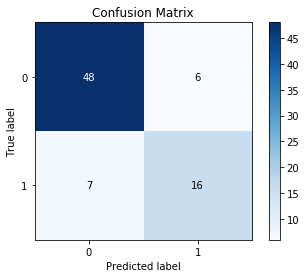

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        54
           1       0.73      0.70      0.71        23

    accuracy                           0.83        77
   macro avg       0.80      0.79      0.80        77
weighted avg       0.83      0.83      0.83        77



In [180]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rf, normalize=False)
plt.show()
print(classification_report(y_val,y_pred_rf))